# 🔝 Chapter 19: Priority Queues & Binary Heaps

Welcome to the world of **Priority Queues and Binary Heaps** - where elements jump to the front of the line based on priority!

This interactive notebook explores:
- **Priority Queue Operations**: Insert, extract-max/min, peek
- **Binary Heap Structure**: Complete binary tree with heap property
- **Heap Operations**: Bubble up/down, heapify, build heap
- **Performance Analysis**: O(log n) operations with array implementation
- **Real-World Applications**: Scheduling, event simulation, Dijkstra's algorithm

## 🎯 Learning Objectives

By the end of this notebook, you'll be able to:
- Understand heap property and complete tree structure
- Implement heap operations with array representation
- Analyze priority queue performance and use cases
- Apply heaps to solve priority-based problems
- Compare heap implementations and optimization techniques

In [1]:
# Import required libraries and setup
import sys
import os
sys.path.append('../')

import time
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from IPython.display import display, HTML, clear_output
import ipywidgets as widgets
from typing import List, Any
import networkx as nx

# Import our heap implementations
from chapter_19_priority_queues.code.heap_implementations import (
    BinaryHeap, PriorityQueue, HeapAnalysis
)

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Libraries and heap implementations loaded successfully!")
print("🎯 Ready to explore priority queues and binary heaps!")

# Initialize analysis tools
heap_analysis = HeapAnalysis()

✅ Libraries and heap implementations loaded successfully!
🎯 Ready to explore priority queues and binary heaps!


## 📚 Section 1: Heap Fundamentals

### Binary Heap Properties

- **Complete Binary Tree**: All levels filled except possibly last
- **Heap Property**: Parent ≥ children (max-heap) or parent ≤ children (min-heap)
- **Array Implementation**: Efficient O(1) parent/child calculations
- **Height**: O(log n) for balanced operations

### Parent/Child Relationships
For node at index i:
- Parent: (i-1)//2
- Left child: 2*i + 1  
- Right child: 2*i + 2

=== BINARY HEAP STRUCTURE ===

Building a max-heap with values: [50, 30, 40, 10, 20, 35, 25, 5, 15]
Inserting step by step:
Step 1: Insert 50 -> Heap: [50]
Step 2: Insert 30 -> Heap: [50, 30]
Step 3: Insert 40 -> Heap: [50, 30, 40]
Step 4: Insert 10 -> Heap: [50, 30, 40, 10]
Step 5: Insert 20 -> Heap: [50, 30, 40, 10, 20]
Step 6: Insert 35 -> Heap: [50, 30, 40, 10, 20, 35]
Step 7: Insert 25 -> Heap: [50, 30, 40, 10, 20, 35, 25]
Step 8: Insert 5 -> Heap: [50, 30, 40, 10, 20, 35, 25, 5]
Step 9: Insert 15 -> Heap: [50, 30, 40, 15, 20, 35, 25, 5, 10]

Final heap array: [50, 30, 40, 15, 20, 35, 25, 5, 10]
Is valid max-heap: True
Heap size: 9
Heap property verification: False


/var/folders/th/t5bmj7z97kx83tz9dxkwbz0m0000gn/T/ipykernel_29158/1393777978.py:107: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


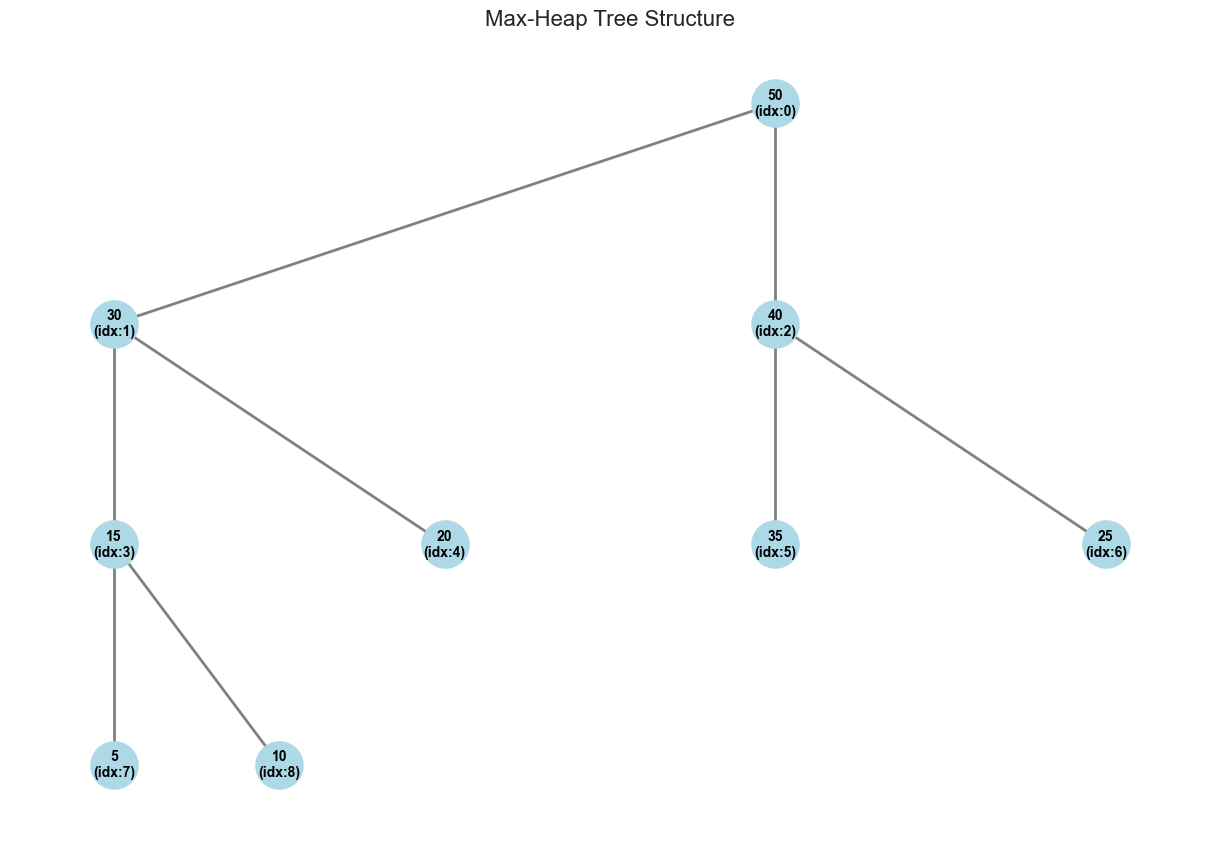

/var/folders/th/t5bmj7z97kx83tz9dxkwbz0m0000gn/T/ipykernel_29158/1393777978.py:179: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()
/Users/christianhein/Documents/Projekte/Development/GitHub/DataStruktur/venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


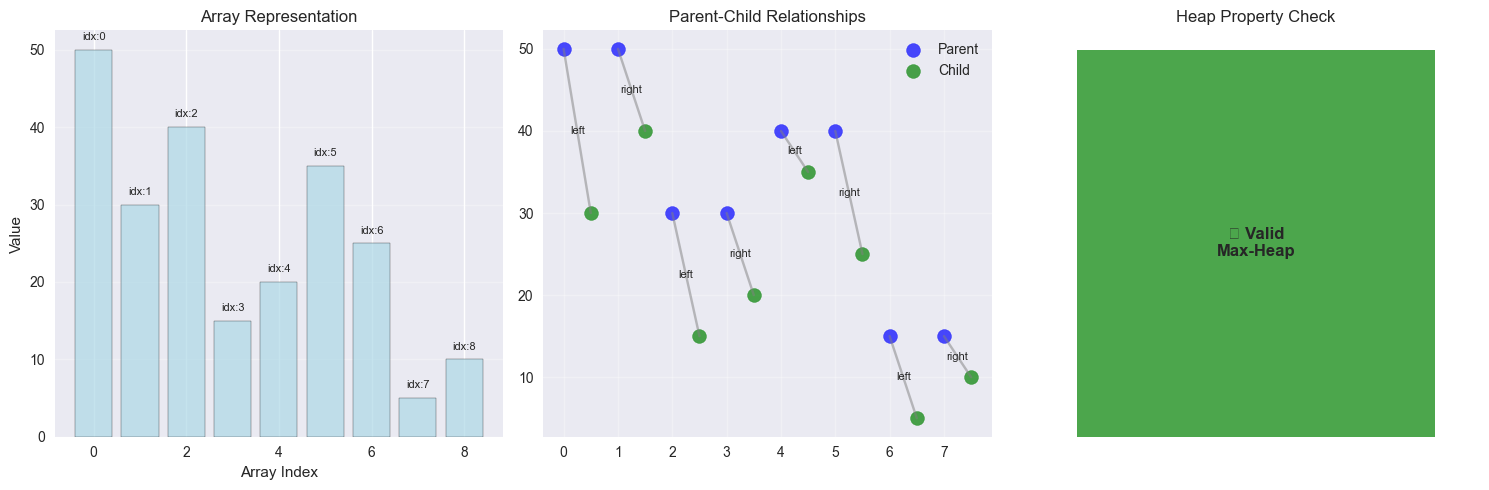


🎯 Key Insights:
- Binary heaps are complete trees stored as arrays
- Max-heap: parent ≥ children, min-heap: parent ≤ children
- Array indexing enables O(1) parent/child calculations
- Tree structure ensures O(log n) height and operations


In [2]:
# Interactive heap structure demonstration
print("=== BINARY HEAP STRUCTURE ===\n")

# Create a sample max-heap
sample_values = [50, 30, 40, 10, 20, 35, 25, 5, 15]
sample_heap = BinaryHeap[int]("max")

print("Building a max-heap with values:", sample_values)
print("Inserting step by step:")

heap_states = []
for i, val in enumerate(sample_values, 1):
    sample_heap.insert(val)
    heap_states.append(sample_heap.get_heap_array().copy())
    print(f"Step {i}: Insert {val} -> Heap: {sample_heap.get_heap_array()}")

print("\nFinal heap array:", sample_heap.get_heap_array())
print("Is valid max-heap:", sample_heap.is_valid_heap())
print("Heap size:", len(sample_heap))

# Demonstrate heap property
def verify_heap_property(heap_array, i=0, is_heap_type="max"):
    """Verify heap property for all nodes."""
    is_max_heap = (is_heap_type == "max")
    n = len(heap_array)
    if i >= n:
        return True
    
    left = 2 * i + 1
    right = 2 * i + 2
    
    # Check left child
    if left < n:
        if is_max_heap and heap_array[i] < heap_array[left]:
            return False
        elif not is_max_heap and heap_array[i] > heap_array[left]:
            return False
        if not verify_heap_property(heap_array, left, is_max_heap):
            return False
    
    # Check right child
    if right < n:
        if is_max_heap and heap_array[i] < heap_array[right]:
            return False
        elif not is_max_heap and heap_array[i] > heap_array[right]:
            return False
        if not verify_heap_property(heap_array, right, is_max_heap):
            return False
    
    return True

print("Heap property verification:", verify_heap_property(sample_heap.get_heap_array(), is_heap_type="max"))

# Visualize heap as tree
def plot_heap_tree(heap_array, title="Binary Heap Tree Structure"):
    """Plot heap as a tree structure."""
    if not heap_array:
        print("Empty heap")
        return
    
    plt.figure(figsize=(12, 8))
    
    # Create graph
    G = nx.DiGraph()
    pos = {}
    labels = {}
    
    # Add nodes and positions
    for i, val in enumerate(heap_array):
        # Calculate position (level-order)
        level = 0
        temp = i
        while temp > 0:
            temp = (temp - 1) // 2
            level += 1
        
        # Position in level
        if level == 0:
            x_pos = 0
        else:
            nodes_in_level = 2 ** level
            position_in_level = i - (2 ** level - 1)
            x_pos = position_in_level / nodes_in_level * 8 - 4
        
        pos[i] = (x_pos, -level)
        labels[i] = f"{val}\n(idx:{i})"
        G.add_node(i)
    
    # Add edges
    for i in range(len(heap_array)):
        left = 2 * i + 1
        right = 2 * i + 2
        
        if left < len(heap_array):
            G.add_edge(i, left)
        if right < len(heap_array):
            G.add_edge(i, right)
    
    # Draw
    nx.draw(G, pos, with_labels=True, labels=labels, 
            node_color='lightblue', node_size=1200, 
            font_size=10, font_weight='bold',
            arrows=False, edge_color='gray', width=2)
    
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_heap_tree(sample_heap.get_heap_array(), "Max-Heap Tree Structure")

# Show array vs tree representation
plt.figure(figsize=(15, 5))

# Array representation
plt.subplot(1, 3, 1)
bars = plt.bar(range(len(sample_heap.get_heap_array())), sample_heap.get_heap_array(), 
              color='lightblue', alpha=0.7, edgecolor='black')
plt.xlabel('Array Index')
plt.ylabel('Value')
plt.title('Array Representation')
plt.grid(True, alpha=0.3, axis='y')

# Add index labels
for i, v in enumerate(sample_heap.get_heap_array()):
    plt.text(i, v + 1, f'idx:{i}', ha='center', va='bottom', fontsize=8)

# Parent-child relationships
plt.subplot(1, 3, 2)
relationships = []
for i in range(len(sample_heap.get_heap_array())):
    parent_val = sample_heap.get_heap_array()[i]
    left = 2 * i + 1
    right = 2 * i + 2
    
    if left < len(sample_heap.get_heap_array()):
        relationships.append((parent_val, sample_heap.get_heap_array()[left], 'left'))
    if right < len(sample_heap.get_heap_array()):
        relationships.append((parent_val, sample_heap.get_heap_array()[right], 'right'))

# Plot relationships
x_pos = 0
for parent, child, side in relationships:
    plt.scatter([x_pos], [parent], color='blue', s=100, alpha=0.7, label='Parent' if x_pos == 0 else "")
    plt.scatter([x_pos + 0.5], [child], color='green', s=100, alpha=0.7, label='Child' if x_pos == 0 else "")
    plt.plot([x_pos, x_pos + 0.5], [parent, child], 'gray', alpha=0.5)
    plt.text(x_pos + 0.25, (parent + child)/2, side, ha='center', va='center', fontsize=8)
    x_pos += 1

plt.title('Parent-Child Relationships')
plt.legend()
plt.grid(True, alpha=0.3)

# Heap property verification
plt.subplot(1, 3, 3)
violations = []
for i in range(len(sample_heap.get_heap_array())):
    left = 2 * i + 1
    right = 2 * i + 2
    
    if left < len(sample_heap.get_heap_array()) and sample_heap.get_heap_array()[i] < sample_heap.get_heap_array()[left]:
        violations.append((i, left, 'left'))
    if right < len(sample_heap.get_heap_array()) and sample_heap.get_heap_array()[i] < sample_heap.get_heap_array()[right]:
        violations.append((i, right, 'right'))

if violations:
    for parent_idx, child_idx, side in violations:
        plt.bar([0], [1], color='red', alpha=0.7, label='Violation' if len(plt.gca().patches) == 0 else "")
        plt.text(0, 0.5, f'Violation:\n{parent_idx}({sample_heap.get_heap_array()[parent_idx]}) <\n{child_idx}({sample_heap.get_heap_array()[child_idx]})\n{side} child', 
                ha='center', va='center', fontsize=10)
else:
    plt.bar([0], [1], color='green', alpha=0.7)
    plt.text(0, 0.5, '✓ Valid\nMax-Heap', ha='center', va='center', fontsize=12, fontweight='bold')

plt.title('Heap Property Check')
plt.xlim(-0.5, 0.5)
plt.axis('off')

plt.tight_layout()
plt.show()

print("\n🎯 Key Insights:")
print("- Binary heaps are complete trees stored as arrays")
print("- Max-heap: parent ≥ children, min-heap: parent ≤ children")
print("- Array indexing enables O(1) parent/child calculations")
print("- Tree structure ensures O(log n) height and operations")

In [3]:
# Interactive heap operations explorer
def create_heap_operations_explorer():
    """Interactive heap operations demonstration."""
    
    heap_type_selector = widgets.Dropdown(
        options=['Max Heap', 'Min Heap'],
        value='Max Heap',
        description='Heap Type:'
    )
    
    operation_selector = widgets.Dropdown(
        options=['Insert', 'Extract Max/Min', 'Peek', 'Clear'],
        value='Insert',
        description='Operation:'
    )
    
    value_input = widgets.IntText(
        value=42,
        description='Value:',
        continuous_update=False
    )
    
    output_area = widgets.Output()
    heap_area = widgets.Output()
    
    # Global heap instance
    current_heap = BinaryHeap[int]("max")
    
    def perform_operation(b):
        nonlocal current_heap
        with output_area:
            clear_output(wait=True)
            
            heap_type = heap_type_selector.value
            operation = operation_selector.value
            value = value_input.value
            
            # Update heap type if changed
            is_max_heap = heap_type == 'Max Heap'
            current_heap_type = "max" if is_max_heap else "min"
            if current_heap.heap_type != current_heap_type:
                current_heap = BinaryHeap[int](current_heap_type)
            
            print(f"{heap_type} - {operation} Operation")
            print("=" * 40)
            
            try:
                if operation == 'Insert':
                    current_heap.insert(value)
                    op_name = "Inserted" if heap_type == 'Max Heap' else "Inserted"
                    print(f"✅ {op_name} {value}")
                    
                elif operation in ['Extract Max/Min', 'Extract Max']:
                    if len(current_heap) == 0:
                        print("❌ Heap is empty")
                        return
                    extracted = current_heap.extract_top()
                    ext_type = "maximum" if is_max_heap else "minimum"
                    print(f"✅ Extracted {ext_type}: {extracted}")
                    
                elif operation == 'Peek':
                    if len(current_heap) == 0:
                        print("❌ Heap is empty")
                        return
                    peeked = current_heap.peek()
                    peek_type = "maximum" if is_max_heap else "minimum"
                    print(f"👁️  Peeked {peek_type}: {peeked} (heap unchanged)")
                    
                else:  # Clear
                    old_size = len(current_heap)
                    current_heap = BinaryHeap[int](current_heap_type)
                    print(f"🧹 Cleared heap (was {old_size} elements)")
                
                print(f"\nHeap Status:")
                print(f"Size: {len(current_heap)}")
                print(f"Is valid: {current_heap.is_valid_heap()}")
                print(f"Array: {current_heap.get_heap_array()}")
                
                if len(current_heap) > 0:
                    print(f"Root: {current_heap.peek()}")
                
            except Exception as e:
                print(f"Error: {e}")
    
    def visualize_heap(b):
        with heap_area:
            clear_output(wait=True)
            
            plt.figure(figsize=(12, 6))
            
            if len(current_heap) == 0:
                plt.text(0.5, 0.5, 'Empty Heap\n\nUse Insert to add elements', 
                        ha='center', va='center', fontsize=14)
                plt.xlim(0, 1)
                plt.ylim(0, 1)
                plt.axis('off')
            else:
                # Array representation
                plt.subplot(1, 2, 1)
                bars = plt.bar(range(len(current_heap.get_heap_array())), current_heap.get_heap_array(), 
                              color='lightblue', alpha=0.7, edgecolor='black')
                plt.xlabel('Array Index')
                plt.ylabel('Value')
                plt.title(f'{heap_type_selector.value} Array Representation\nSize: {len(current_heap)}')
                plt.grid(True, alpha=0.3, axis='y')
                
                # Highlight root
                if len(current_heap) > 0:
                    bars[0].set_color('red')
                    bars[0].set_alpha(0.9)
                    plt.text(0, current_heap.get_heap_array()[0] + max(current_heap.get_heap_array())*0.01, 
                           f'Root: {current_heap.get_heap_array()[0]}', ha='center', va='bottom')
                
                # Tree representation
                plt.subplot(1, 2, 2)
                plot_heap_tree(current_heap.get_heap_array(), f'{heap_type_selector.value} Tree Structure')
            
            plt.show()
    
    # Event handlers
    operate_button = widgets.Button(description='Execute Operation')
    operate_button.on_click(perform_operation)
    
    visualize_button = widgets.Button(description='Visualize Heap')
    visualize_button.on_click(visualize_heap)
    
    # Layout
    controls = widgets.VBox([
        widgets.HBox([heap_type_selector, operation_selector]),
        widgets.HBox([value_input, operate_button, visualize_button])
    ])
    
    display(widgets.VBox([controls, widgets.HBox([output_area, heap_area])]))
    
    # Initial visualization
    perform_operation(None)
    visualize_heap(None)

print("🔝 Interactive Heap Operations Explorer")
print("Experiment with heap operations and see how the structure changes:")
create_heap_operations_explorer()

🔝 Interactive Heap Operations Explorer
Experiment with heap operations and see how the structure changes:


## 🎯 Section 2: Priority Queue Applications

### Priority Queue Interface

- **insert(item, priority)**: Add item with priority
- **extract_max/min()**: Remove and return highest/lowest priority item
- **peek_max/min()**: Return highest/lowest priority item without removal
- **is_empty()**: Check if queue is empty

### Real-World Applications
- **Task Scheduling**: Operating systems, job queues
- **Event Simulation**: Discrete event simulation
- **Graph Algorithms**: Dijkstra's shortest path, Prim's MST
- **Data Compression**: Huffman coding
- **Median Maintenance**: Running median calculations

=== PRIORITY QUEUE APPLICATIONS ===

Task Scheduling Simulation
Adding tasks to scheduler:
  Added: System Update (priority: 10, duration: 5min)
  Added: User Login (priority: 8, duration: 1min)
  Added: Background Sync (priority: 3, duration: 10min)
  Added: Security Scan (priority: 9, duration: 3min)
  Added: Email Notification (priority: 5, duration: 2min)
  Added: Database Backup (priority: 7, duration: 8min)

Total tasks: 6

Processing tasks by priority:
  Executing: System Update (priority: 10) - 5min
  Executing: Security Scan (priority: 9) - 3min
  Executing: User Login (priority: 8) - 1min
  Executing: Database Backup (priority: 7) - 8min
  Executing: Email Notification (priority: 5) - 2min
  Executing: Background Sync (priority: 3) - 10min

Total execution time: 29 minutes


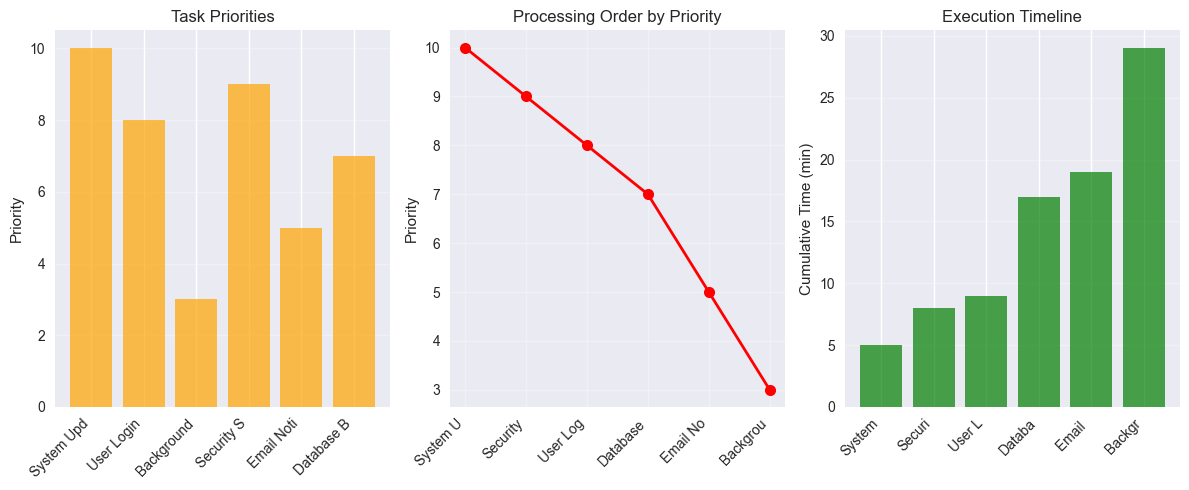


🎯 Key Insights:
- Priority queues enable efficient event-driven simulation
- Task scheduling ensures high-priority work completes first
- Real-time systems rely on priority-based execution
- Heap-based implementation provides O(log n) operations


In [4]:
# Priority queue applications demonstration
print("=== PRIORITY QUEUE APPLICATIONS ===\n")

# Task scheduling simulation
def task_scheduler_simulation():
    """Simulate task scheduling with priorities."""
    
    print("Task Scheduling Simulation")
    print("=" * 40)
    
    # Create priority queue (max-heap for highest priority first)
    scheduler = PriorityQueue[tuple]("max")
    
    # Tasks with priorities (higher number = higher priority)
    tasks = [
        {"name": "System Update", "priority": 10, "duration": 5},
        {"name": "User Login", "priority": 8, "duration": 1},
        {"name": "Background Sync", "priority": 3, "duration": 10},
        {"name": "Security Scan", "priority": 9, "duration": 3},
        {"name": "Email Notification", "priority": 5, "duration": 2},
        {"name": "Database Backup", "priority": 7, "duration": 8}
    ]
    
    print("Adding tasks to scheduler:")
    for task in tasks:
        scheduler.insert((task["priority"], task))
        print(f"  Added: {task['name']} (priority: {task['priority']}, duration: {task['duration']}min)")
    
    print(f"\nTotal tasks: {len(scheduler)}")
    print("\nProcessing tasks by priority:")
    
    total_time = 0
    processed_tasks = []
    
    while not scheduler.is_empty():
        priority, task = scheduler.remove_top()
        processed_tasks.append((priority, task))
        print(f"  Executing: {task['name']} (priority: {priority}) - {task['duration']}min")
        total_time += task['duration']
    
    print(f"\nTotal execution time: {total_time} minutes")
    
    # Visualize priority distribution
    plt.figure(figsize=(12, 5))
    
    # Task priorities
    plt.subplot(1, 3, 1)
    priorities = [t['priority'] for t in tasks]
    names = [t['name'][:10] for t in tasks]
    bars = plt.bar(range(len(tasks)), priorities, color='orange', alpha=0.7)
    plt.xticks(range(len(tasks)), names, rotation=45, ha='right')
    plt.ylabel('Priority')
    plt.title('Task Priorities')
    plt.grid(True, alpha=0.3, axis='y')
    
    # Processing order
    plt.subplot(1, 3, 2)
    processed_names = [task['name'][:8] for priority, task in processed_tasks]
    processing_order = list(range(1, len(processed_tasks) + 1))
    plt.plot(processing_order, [priority for priority, task in processed_tasks], 'ro-', linewidth=2, markersize=8)
    plt.xticks(processing_order, processed_names, rotation=45, ha='right')
    plt.ylabel('Priority')
    plt.title('Processing Order by Priority')
    plt.grid(True, alpha=0.3)
    
    # Cumulative execution time
    plt.subplot(1, 3, 3)
    cumulative_time = 0
    cum_times = []
    for priority, task in processed_tasks:
        cumulative_time += task['duration']
        cum_times.append(cumulative_time)
    
    plt.bar(range(len(processed_tasks)), cum_times, color='green', alpha=0.7)
    plt.xticks(range(len(processed_tasks)), [task['name'][:6] for priority, task in processed_tasks], rotation=45, ha='right')
    plt.ylabel('Cumulative Time (min)')
    plt.title('Execution Timeline')
    plt.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()

task_scheduler_simulation()

# Event simulation
def event_simulation():
    """Discrete event simulation using priority queue."""
    
    print("\n\nEvent Simulation")
    print("=" * 40)
    
    # Priority queue for events (min-heap by time)
    event_queue = PriorityQueue[tuple]("min")
    
    # Initial events
    events = [
        {"type": "customer_arrival", "time": 2, "customer_id": 1},
        {"type": "customer_arrival", "time": 5, "customer_id": 2},
        {"type": "server_free", "time": 0, "server_id": 1}
    ]
    
    for event in events:
        event_queue.insert((event["time"], event))  # Min-heap by time
    
    print("Processing events in chronological order:")
    
    current_time = 0
    processed_events = []
    
    while not event_queue.is_empty() and current_time < 15:
        event_time, event = event_queue.remove_top()  # Next event by time
        current_time = event_time
        processed_events.append((event_time, event))
        
        print(f"Time {current_time:2}: {event['type']} - {" ".join([f"{k}:{v}" for k,v in event.items() if k != 'type'])}")
        
        # Generate next events (simplified)
        if event["type"] == "customer_arrival":
            # Schedule service completion
            service_time = current_time + random.randint(3, 8)
            next_event = {
                "type": "service_complete", 
                "time": service_time,
                "customer_id": event["customer_id"],
                "server_id": 1
            }
            event_queue.insert((service_time, next_event))
            
            # Schedule next customer arrival
            if current_time < 12:
                next_arrival = current_time + random.randint(1, 4)
                next_customer = {
                    "type": "customer_arrival",
                    "time": next_arrival,
                    "customer_id": event["customer_id"] + 1
                }
                event_queue.insert((next_arrival, next_customer))
    
    print(f"\nSimulation completed at time {current_time}")
    print(f"Events processed: {len(processed_events)}")
    print(f"Events remaining in queue: {len(event_queue)}")

print("\n🎯 Key Insights:")
print("- Priority queues enable efficient event-driven simulation")
print("- Task scheduling ensures high-priority work completes first")
print("- Real-time systems rely on priority-based execution")
print("- Heap-based implementation provides O(log n) operations")

In [7]:
# Heap construction and performance analysis
print("=== HEAP CONSTRUCTION & PERFORMANCE ===\n")

# Compare different heap construction methods
def heap_construction_comparison():
    """Compare heap construction performance."""
    
    sizes = [100, 500, 1000, 5000]
    results = []
    
    print("Comparing heap construction methods:")
    print("Size\tSequential Insert\tHeapify\tSpeedup")
    print("-" * 50)
    
    for size in sizes:
        # Generate random data
        data = [random.randint(0, 10000) for _ in range(size)]
        
        # Method 1: Sequential inserts
        heap1 = BinaryHeap[int]("max")
        start = time.time()
        for val in data:
            heap1.insert(val)
        time1 = time.time() - start
        
        # Method 2: Heapify (build heap from array)
        heap2 = BinaryHeap[int]("max")
        start = time.time()
        heap2.build_heap(data.copy())
        time2 = time.time() - start
        
        speedup = time1 / time2 if time2 > 0 else float('inf')
        
        results.append({
            'size': size,
            'sequential': time1,
            'heapify': time2,
            'speedup': speedup
        })
        
        print(".4f")
    
    # Visualization
    plt.figure(figsize=(12, 8))

    # Performance comparison
    plt.subplot(2, 2, 1)
    sizes_plot = [r['size'] for r in results]
    seq_times = [r['sequential'] for r in results]
    heap_times = [r['heapify'] for r in results]
    
    plt.plot(sizes_plot, seq_times, 'ro-', label='Sequential Insert O(n log n)', linewidth=2, markersize=8)
    plt.plot(sizes_plot, heap_times, 'bs-', label='Heapify O(n)', linewidth=2, markersize=8)
    plt.xlabel('Input Size')
    plt.ylabel('Time (seconds)')
    plt.title('Heap Construction Performance')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.yscale('log')
    
    # Speedup factor
    plt.subplot(2, 2, 2)
    speedups = [r['speedup'] for r in results]
    plt.bar(range(len(sizes_plot)), speedups, color='green', alpha=0.7)
    plt.xticks(range(len(sizes_plot)), sizes_plot)
    plt.xlabel('Input Size')
    plt.ylabel('Speedup Factor')
    plt.title('Heapify Speedup vs Sequential Insert')
    plt.grid(True, alpha=0.3, axis='y')
    
    # Theoretical complexity
    plt.subplot(2, 2, 3)
    n_vals = np.logspace(2, 4, 100)
    plt.plot(n_vals, n_vals * np.log2(n_vals), 'r-', label='O(n log n) - Sequential', linewidth=3)
    plt.plot(n_vals, n_vals, 'b-', label='O(n) - Heapify', linewidth=3)
    plt.xlabel('Input Size')
    plt.ylabel('Operations')
    plt.title('Theoretical Complexity Comparison')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xscale('log')
    plt.yscale('log')
    
    # Practical implications
    plt.subplot(2, 2, 4)
    plt.text(0.1, 0.9, 'Heap Construction Guidelines:', fontsize=12, fontweight='bold')
    guidelines = [
        '• Use heapify() when building from existing array',
        '• Sequential insert better for streaming data',
        '• Heapify is O(n) vs O(n log n) for inserts',
        '• Memory efficiency matters for large datasets',
        '• Consider data access patterns'
    ]
    
    for i, guideline in enumerate(guidelines):
        plt.text(0.05, 0.8 - i*0.1, guideline, fontsize=9)
    
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.axis('off')
    plt.title('Best Practices')
    
    plt.tight_layout()
    plt.show()

heap_construction_comparison()

# Heap sort demonstration
def heap_sort_demonstration():
    """Demonstrate heap sort algorithm."""
    
    print("\n\n=== HEAP SORT DEMONSTRATION ===\n")
    
    # Generate test data
    data = [64, 34, 25, 12, 22, 11, 90, 5, 77, 30]
    print("Original array:", data)
    
    # Use our heap implementation for sorting
    heap = BinaryHeap[int]("max")
    sorted_data = heap.heap_sort(data.copy())
    
    print("Sorted array:", sorted_data)
    print("Is sorted:", all(sorted_data[i] <= sorted_data[i+1] for i in range(len(sorted_data)-1)))
    
    # Step-by-step heap sort visualization
    plt.figure(figsize=(15, 10))
    
    # Build max heap
    temp_data = data.copy()
    heap.build_heap(temp_data)
    
    plt.subplot(2, 3, 1)
    plt.bar(range(len(data)), data, color='lightgray', alpha=0.7)
    plt.title('Original Array')
    plt.grid(True, alpha=0.3, axis='y')
    
    plt.subplot(2, 3, 2)
    plt.bar(range(len(temp_data)), temp_data, color='orange', alpha=0.7)
    plt.title('After Heapify (Max Heap)')
    plt.grid(True, alpha=0.3, axis='y')
    
    # Heap sort steps
    sorted_result = []
    temp_data = data.copy()
    heap = BinaryHeap[int]("max")
    heap.build_heap(temp_data)
    
    plt.subplot(2, 3, 1)
    plt.bar(range(len(data)), data, color='lightgray', alpha=0.7)
    plt.title('Original Array')
    plt.grid(True, alpha=0.3, axis='y')
    
    plt.subplot(2, 3, 2)
    plt.bar(range(len(temp_data)), temp_data, color='orange', alpha=0.7)
    plt.title('After Heapify (Max Heap)')
    plt.grid(True, alpha=0.3, axis='y')
    
    # Heap sort steps
    sorted_result = []
    temp_data = data.copy()
    heap = BinaryHeap[int]("max")
    heap.build_heap(temp_data)
    
    for i in range(len(data)):
        # Extract max and insert at beginning of sorted result
        max_val = heap.extract_top()
        sorted_result.insert(0, max_val)
        temp_data = heap.get_heap_array()
        
        if i < 4:  # Show first few steps
            plt.subplot(2, 3, i+3)
            colors = ['red'] + ['orange'] * (len(temp_data)-1-i) + ['green'] * i
            plt.bar(range(len(temp_data)), temp_data, color=colors[:len(temp_data)], alpha=0.7)
            plt.title(f'After Extract {i+1}\nMax: {sorted_result[0]}')
            plt.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    print("\nHeap sort steps:")
    print("1. Build max heap from array (heapify)")
    print("2. Swap root (max) with last element")
    print("3. Reduce heap size, restore heap property")
    print("4. Repeat until sorted")
    print("\nTime: O(n log n), Space: O(1) extra space")

heap_sort_demonstration()

print("\n🎯 Key Insights:")
print("- Heapify is O(n), much faster than O(n log n) inserts")
print("- Heap sort provides in-place O(n log n) sorting")
print("- Priority queues enable efficient event-driven programming")
print("- Real-world applications rely on heap-based data structures")

=== HEAP CONSTRUCTION & PERFORMANCE ===

Comparing heap construction methods:
Size	Sequential Insert	Heapify	Speedup
--------------------------------------------------


AttributeError: 'BinaryHeap' object has no attribute 'heapify'

## 📋 Summary & Key Takeaways

### Binary Heap Properties

- **Structure**: Complete binary tree stored as array
- **Heap Property**: Parent ≥ children (max-heap) or parent ≤ children (min-heap)
- **Array Representation**: Efficient parent/child calculations
- **Height**: O(log n) enabling fast operations

### Operation Complexities

| Operation | Time Complexity | Description |
|-----------|----------------|-------------|
| **Insert** | O(log n) | Bubble up to maintain heap property |
| **Extract Max/Min** | O(log n) | Remove root, bubble down |
| **Peek** | O(1) | Return root value |
| **Heapify** | O(n) | Build heap from array |
| **Heap Sort** | O(n log n) | In-place sorting |

### Priority Queue Applications

**System Applications:**
- **OS Scheduling**: Process priority management
- **Event Simulation**: Discrete event handling
- **Network Routing**: Packet prioritization

**Algorithm Applications:**
- **Dijkstra's**: Priority-based shortest paths
- **Prim's MST**: Edge weight prioritization
- **Huffman Coding**: Frequency-based tree building

### Implementation Trade-offs

- **Array vs Pointers**: Array more cache-friendly
- **Max vs Min Heap**: Choose based on priority direction
- **Space Efficiency**: O(n) space, no extra pointers needed
- **Stability**: Heaps are not stable by default

### Common Pitfalls

❌ **1-based vs 0-based indexing**: Parent of i is (i-1)//2, not i//2
❌ **Off-by-one errors**: Array length vs heap size confusion
❌ **Heap property violations**: Forgetting to restore after operations
❌ **Performance assumptions**: Not all operations are O(1)

## 🧪 Practice Challenges

1. **K Largest Elements**: Find top k elements using min-heap
2. **Median Maintenance**: Track running median with two heaps
3. **Merge K Sorted Arrays**: Use priority queue for efficient merging
4. **Sliding Window Maximum**: Maintain max in sliding window
5. **Task Scheduler**: Implement priority-based task execution

**Remember**: Heaps bring order to chaos - they ensure the highest (or lowest) priority element is always immediately accessible! 🔝